#**Walmart Data Analyst Interview Experience (1-3 Years)**

# **Python**

#Q1. Write a Python script to identify unique values in a list and count their occurrences. This tests your understanding of sets and dictionaries.

In [4]:
def count_unique_values(input_list):
    value_count = {}
    for value in input_list:
        if value in value_count:
            value_count[value] += 1
        else:
            value_count[value] = 1
    return value_count

user_input = input("Enter a list of values separated by commas: ")
input_list = [int(item) for item in user_input.split(",")]

result = count_unique_values(input_list)

print("Unique values and their occurrences:")
for value, count in result.items():
    print(f"Value: {value}, Count: {count}")

Enter a list of values separated by commas: 1,2,2,2,3,3,4,4,5,5,5,5,6
Unique values and their occurrences:
Value: 1, Count: 1
Value: 2, Count: 3
Value: 3, Count: 2
Value: 4, Count: 2
Value: 5, Count: 4
Value: 6, Count: 1


#Q.2. How would you use pandas to merge two datasets and calculate total sales for products with valid promotions? This involves merge(), groupby(), and basic data analysis functions.

In [7]:
import pandas as pd

data1 = {
    'product_id': [1, 2, 3, 4, 5],
    'product_name': ['A', 'B', 'C', 'D', 'E'],
    'sales': [100, 200, 150, 300, 250]
}

data2 = {
    'product_id': [1, 2, 3, 4, 5],
    'promotion_status': [True, False, True, True, False],
    'discount': [10, 20, 15, 25, 30]
}

df_products = pd.DataFrame(data1)
df_promotions = pd.DataFrame(data2)

merged_df = pd.merge(df_products, df_promotions, on='product_id')

valid_promotions = merged_df[merged_df['promotion_status'] == True].copy()

valid_promotions['total_sales'] = valid_promotions['sales'] * (1 - valid_promotions['discount'] / 100)

total_sales_per_product = valid_promotions.groupby('product_name')['total_sales'].sum()

print(total_sales_per_product)

product_name
A     90.0
C    127.5
D    225.0
Name: total_sales, dtype: float64


#Q3. Explain the differences between lists, tuples, sets, and dictionaries in Python, highlighting their use cases in data manipulation and analysis.
In Python, lists, tuples, sets, and dictionaries are built-in data structures, each serving different purposes.
1. Lists
#Lists are ordered collections of items, and they allow duplicates. They are mutable, meaning you can change their contents (add, remove, or modify elements).

__Syntax__: my_list = [1, 2, 3, 4]

###Key Characteristics
- Ordered: The order of elements is preserved.
- Mutable: You can change the list (add/remove elements).
- Allows duplicates: Multiple occurrences of the same element are allowed.
- Heterogeneous: Can store elements of different types (e.g., integers, strings, objects).
###Use Cases:
- Storing and manipulating data in a specific order.
- Useful when you need to frequently modify the collection (e.g., append or remove elements).
- Often used in data manipulation tasks like filtering, slicing, and iterating.
2. Tuples
##Tuples are ordered collections, similar to lists, but they are immutable. Once a tuple is created, its contents cannot be modified.
__Syntax__: my_tuple = (1, 2, 3, 4)
###Key Characteristics:
- Ordered: The order of elements is preserved.
- Immutable: You cannot change the tuple (no add/remove or update operations).
- Allows duplicates: Like lists, tuples can have repeated elements.
- Heterogeneous: Can store elements of different types.
###Use Cases:
- Used for fixed collections of data, such as returning multiple values from a function or storing data that should not change.
- Ideal for situations where immutability is important (e.g., using as keys in a dictionary).
3. Sets
##Sets are unordered collections of unique elements. They are mutable but do not allow duplicates.
__Syntax__: my_set = {1, 2, 3, 4}
###Key Characteristics:
- Unordered: The elements do not maintain any specific order.
- Mutable: You can add and remove elements from a set.
- No duplicates: All elements are unique.
- Efficient membership tests: Sets provide fast O(1) time complexity for checking whether an item exists in the set.
###Use Cases:
- Removing duplicates from a collection.
- Performing set operations like union, intersection, and difference.
- Ideal for checking membership quickly, such as filtering unique items from large datasets.
4. Dictionaries
##Dictionaries are unordered collections of key-value pairs. They are mutable, and each key must be unique. Keys are used to retrieve values.
__Syntax__: my_dict = {'key1': 'value1', 'key2': 'value2'}
###Key Characteristics:
- Unordered: Prior to Python 3.7, dictionaries were unordered. In Python 3.7 and later, insertion order is maintained.
- Mutable: You can add, remove, or modify key-value pairs.
- Unique keys: Each key must be unique, but values can be duplicated.
- Efficient access: Dictionaries provide fast O(1) time complexity for retrieving values by key.
###Use Cases:
- Storing key-value data where you need to look up values based on specific keys.
- Ideal for scenarios like counting occurrences of elements, representing s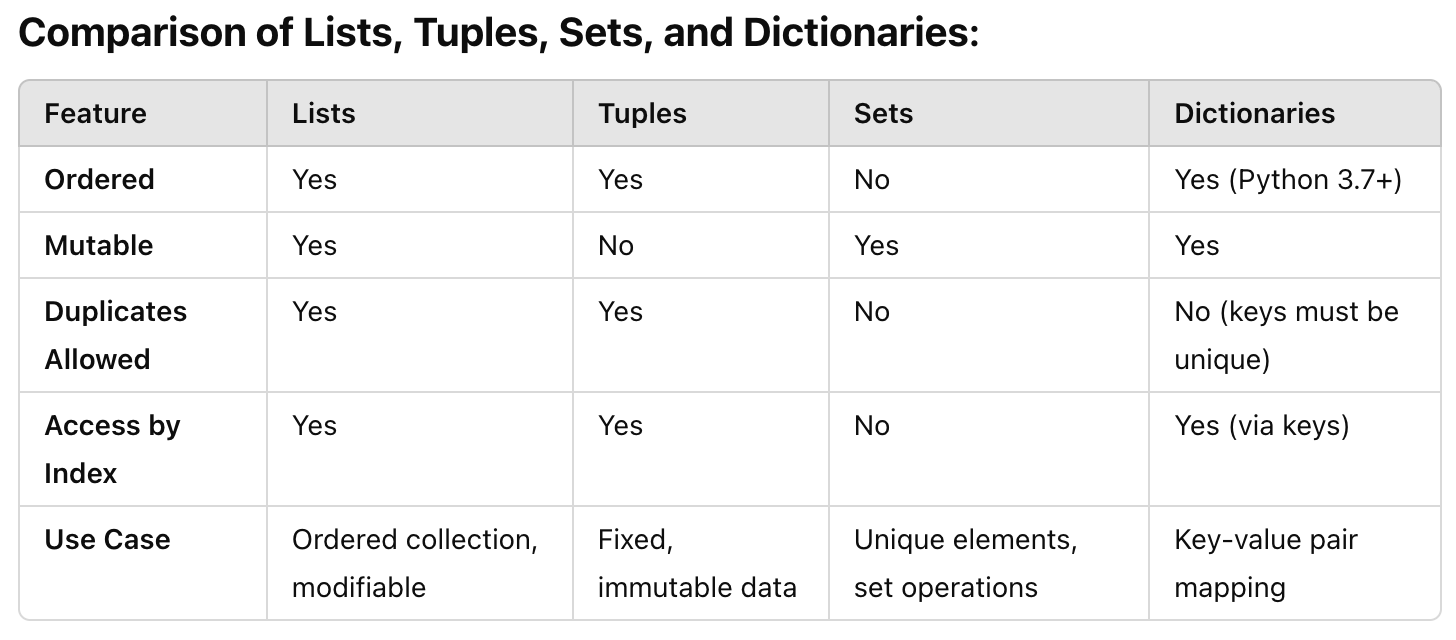tructured data (e.g., JSON-like structures), and creating lookups for quick access.


#**SQL**

##Q1. Write a query to find the second-highest salary in a department. You might use ROW_NUMBER() or DENSE_RANK() to achieve this.

In [ ]:
#Ans.
#Sql
SELECT department_id, employee_name, salary
FROM (
    SELECT department_id,
           employee_name,
           salary,
           ROW_NUMBER() OVER (PARTITION BY department_id ORDER BY salary DESC) AS rank
    FROM employees
) ranked_salaries
WHERE rank = 2;

##Q2. Create a query to calculate the total number of transactions per user for each day. This typically involves GROUP BY and COUNT() for aggregation.

In [ ]:
#Ans.
#sql
SELECT user_id,
       CAST(transaction_date AS DATE) AS transaction_day,
       COUNT(transaction_id) AS total_transactions
FROM transactions
GROUP BY user_id, CAST(transaction_date AS DATE)
ORDER BY transaction_day, user_id;

##Q3. Write a query to select projects with the highest budget-per-employee ratio from two related tables (projects and employees). This tests your ability to handle complex joins and aggregations.


In [ ]:
#Ans.
#sql
WITH project_employee_count AS (
    SELECT
        p.project_id,
        p.project_name,
        p.budget,
        COUNT(e.employee_id) AS total_employees
    FROM projects p
    LEFT JOIN employees e
        ON p.project_id = e.project_id
    GROUP BY p.project_id, p.project_name, p.budget
),
budget_ratio AS (
    SELECT
        project_id,
        project_name,
        budget,
        total_employees,
        CASE
            WHEN total_employees > 0 THEN budget / total_employees
            ELSE 0
        END AS budget_per_employee
    FROM project_employee_count
)
SELECT
    project_id,
    project_name,
    budget,
    total_employees,
    budget_per_employee
FROM budget_ratio
WHERE budget_per_employee = (SELECT MAX(budget_per_employee) FROM budget_ratio);


#**Power BI**

##Q1.Explain the difference between Import and Direct Query modes. Which would you choose for large datasets? (Direct Query enables real-time data but may be slower, whereas Import is faster but static.)
###Ans.
In Power BI, Import and DirectQuery are two distinct data connectivity modes, each with unique characteristics:

##Import Mode:

- Data Storage: Data is imported and stored within Power BI's in-memory engine.
Performance: Generally offers faster performance due to in-memory querying.
Data Freshness: Data is static and requires scheduled refreshes to stay updated.
- Modeling Flexibility: Supports advanced data transformations and the full range of DAX functions.
- Use Cases: Ideal for smaller datasets that don't require real-time updates.
##DirectQuery Mode:
- Data Storage: Data remains in the source system; Power BI queries it in real-time.
- Performance: May experience slower performance, as each interaction triggers a query to the data source.
- Data Freshness: Always reflects the most current data from the source.
- Modeling Flexibility: Some limitations exist in data transformations and DAX functions.
- Use Cases: Suitable for large datasets or scenarios requiring real-time data access.
##Choosing the Appropriate Mode for Large Datasets:
- DirectQuery: Often preferred for large datasets, as it avoids the need to - import vast amounts of data into Power BI. This mode ensures access to the most current data without the overhead of data refreshes. However, performance can be impacted by the complexity of queries and the responsiveness of the underlying data source.
- Import Mode: While it can handle large datasets, performance may degrade if the dataset is excessively large. Additionally, data refreshes can become time-consuming and resource-intensive.
- Recommendation: For large datasets, DirectQuery is generally recommended due to its ability to handle substantial data volumes without importing them into Power BI. It provides real-time data access, which is beneficial for up-to-date reporting. However, be mindful of potential performance implications and ensure that the underlying data source can handle the query load efficiently.

###In some cases, a composite model—combining both Import and DirectQuery modes—might be appropriate. This approach allows you to leverage the strengths of both modes, using Import for smaller, frequently accessed tables and DirectQuery for larger, dynamic datasets.

##Q2. What are slicers, and how do they differ from visual-level filters? Discuss their impact on data in a Power BI dashboard.
###Ans.
1. Slicers:
##Slicers are interactive visual tools (like buttons or dropdown menus) that allow users to filter the data displayed in other visuals on a Power BI dashboard.
- Scope of Impact: Slicers apply to all visuals on a page unless explicitly scoped to specific visuals.
- User Interaction: End users can easily interact with slicers, selecting or deselecting options to filter dashboard content in real time.
- Visual Representation: They are displayed as buttons, checkboxes, lists, or dropdowns directly on the dashboard, making them user-friendly and intuitive.
- Use Case: Best suited for interactive dashboards where users need to explore or "slice" data dynamically (e.g., filtering sales by region, product, or year).
###Example: A slicer for "Year" allows users to select 2023. All visuals on the page update to show data for 2023 only.

2. Visual-Level Filters:
##Visual-level filters are filters applied directly to a specific visual, affecting only that visual's data without influencing other visuals on the page.
- Scope of Impact: Filters affect only one specific visual and do not impact the rest of the page or report.
- User Interaction: Users cannot directly interact with visual-level filters, as they are configured by report designers in Power BI Desktop or Service.
- Visual Representation: Filters are not displayed directly on the dashboard. They are "hidden" in the filter pane, accessible only to report designers.
- Use Case: Best suited for fine-tuning or restricting data for specific visuals, such as showing only the top 10 products in a bar chart.
###Example: A visual-level filter on a chart may restrict it to only display data for 2023, while other visuals on the same page may continue showing data for all years.
#Impact on Power BI Dashboard
###User Experience:
- Slicers provide a more interactive, user-friendly experience, empowering users to filter data dynamically.
- Visual-level filters offer more control to the report creator, ensuring a consistent view for specific visuals.
###Performance:
- Too many slicers may affect dashboard performance, as each change triggers multiple queries.
- Visual-level filters are more lightweight, as they only affect a single visual.
###Customization and Flexibility:
- Slicers offer end users flexibility, while visual-level filters give designers precision control.
- For a more dynamic dashboard, use slicers. For fixed, specific data views, use visual-level filters.
##When to Use Each?
- Use Slicers when you want end users to interact with the report and filter multiple visuals simultaneously.
- Use Visual-Level Filters when you want to restrict specific visuals to only show particular data (like "Top 10 products") or apply custom conditions on a single visual.
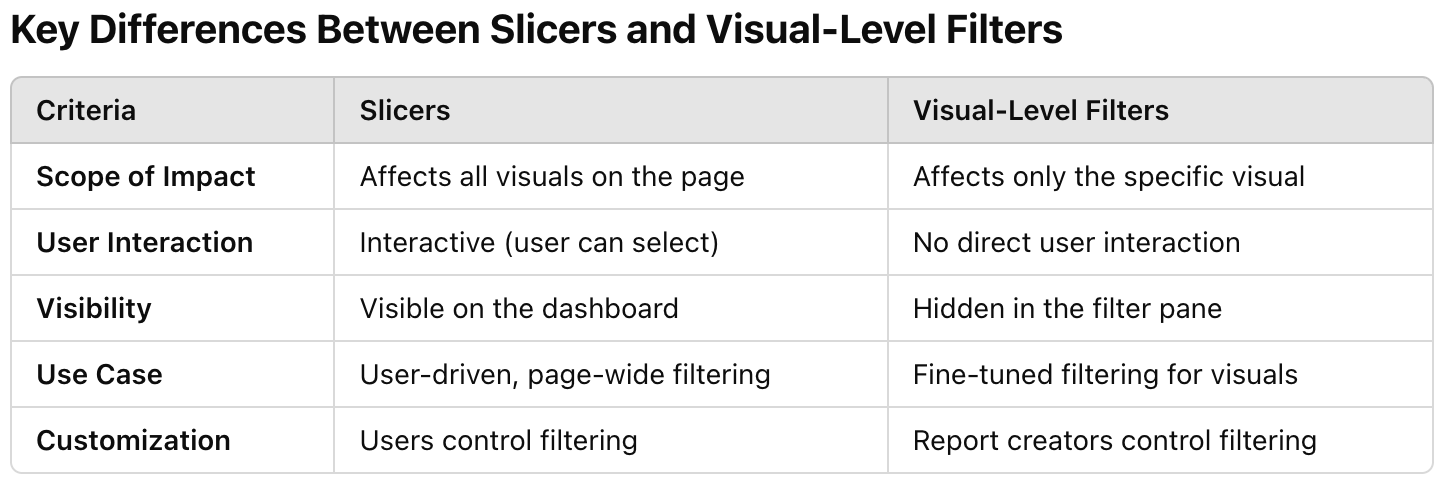

#Q3. How do you implement Row-Level Security (RLS) in Power BI? Explain how you would restrict data access to specific users or groups.
Row-Level Security (RLS) in Power BI allows you to restrict data access for specific users or groups based on roles. This means users only see the data they are authorized to view, enhancing data security and confidentiality.

##Steps to Implement Row-Level Security (RLS)
Here is a step-by-step guide to implementing RLS in Power BI:

1. Create Roles in Power BI Desktop
- Open the Report in Power BI Desktop.
- Go to the Modeling Tab and select Manage Roles.
- Create a New Role by clicking Create.
- Define Role Filters by specifying conditions on the relevant tables.For example:
-__Syntax__: [Region] = "North" (If you want to restrict the user's view to "North" region only)
-Dynamic Filtering: If you want to filter data based on user identity, use the DAX function USERPRINCIPALNAME() to identify the logged-in user. Example: [Email] = USERPRINCIPALNAME()
-Save the Role with a meaningful name (e.g., "North Region Users").
2. Test the Role in Power BI Desktop
- Click "View as Roles" to test the role.
- Select the role you created and view how the data changes.
- Verify that users assigned to this role only see the filtered data.
3. Publish the Report to Power BI Service
- Save and Publish the Power BI file to the Power BI Service.
4. Assign Users to Roles in Power BI Service
- Go to Power BI Service (app.powerbi.com).
- Open the Dataset associated with your report.
- Select the Security option (located next to the dataset).
- Assign Users or Groups to the created roles by typing their email addresses.
- Save Changes and ensure the appropriate access is assigned.
5. Test the Role in Power BI Service
- Use "Test as Role" to see how users experience the dashboard.
- Check if the data is correctly filtered for users assigned to the role.
#Example of RLS Implementation
Scenario:
You want to restrict sales data so that "User1" can only see data for Region = North.

##Implementation Steps:

- Create a role called North Region Users in Power BI Desktop.
Add a filter on the Region column of the table:
###DAX
[Region] = "North"
- Publish the report and go to Power BI Service.
- Assign User1 to the "North Region Users" role.
- Test by using the "View as Role" option to ensure User1 only sees data for Region = North.
###Dynamic Row-Level Security
Dynamic RLS assigns roles based on the current user's email or user ID. This approach is useful when access rules depend on the user's identity.

####How to Implement Dynamic RLS:

- Add a User Table that maps email IDs to access rights (e.g., regions they can view).
- Use USERPRINCIPALNAME() in DAX to match the logged-in user's email to the User Table.
- Example Filter:
####DAX
[Email] = USERPRINCIPALNAME()
- This approach ensures that user1@example.com only sees data for the "North" region, while user2@example.com sees data for the "South" region.
###Best Practices for RLS
- Use Dynamic RLS if the access rules are user-dependent (like region-based filtering).
- Test Roles Thoroughly to avoid unauthorized data access.
- Document Roles and Filters so future developers understand the security logic.
- Use Groups Over Individuals where possible for easier role management.


#Q4. What is a paginated report, and when would you use it? These are ideal for multi-page outputs like invoices or billing statements.
##Ans.
##Paginated Reports in Power BI:
A paginated report is a type of report in Power BI that is designed for printing or generating output that spans multiple pages. Unlike interactive Power BI reports, which are optimized for dynamic, on-screen exploration, paginated reports are focused on providing precise, formatted, and static outputs that can be printed or exported into file formats like PDF or Excel.

###Key Characteristics of Paginated Reports:
- Multi-page Layout: Paginated reports can span across multiple pages, which makes them ideal for large, detailed reports, such as invoices, financial statements, or inventory lists.
- Precise Control Over Formatting: These reports provide full control over the layout, including the positioning of tables, charts, text boxes, and images. This ensures that the report appears exactly as intended, whether on-screen or in print.
- Fixed Design: Unlike interactive reports, the design of paginated reports is fixed. This means that the content, formatting, and arrangement are predefined by the report designer and do not change dynamically based on user interaction.
##When to Use Paginated Reports:
Paginated reports are particularly useful in situations where:
- Multi-page outputs are required: They are perfect for generating reports that span across multiple pages, such as:
 - Invoices and billing statements: These typically require specific formatting and the ability to handle multiple rows of data across pages.
 -Financial statements and yearly reports: These may include detailed data tables or summaries that must fit neatly into a printed format.
 -Purchase orders, employee pay stubs, and legal contracts: These types of reports need fixed formatting and must remain consistent in structure across all pages.
- Precise Control Over Layout: When you need detailed control over how data appears on each page and in each section (e.g., precise column widths, page breaks, headers, footers), paginated reports offer much more flexibility compared to interactive reports.
- Print-Friendly Reports: Paginated reports are designed to be printed or exported as files (PDF, Excel, Word), making them ideal for scenarios where end users need a formatted, printable report rather than an interactive, on-screen dashboard.

##Examples of When to Use Paginated Reports:
- Invoices: When a company needs to generate invoices for customers, where each invoice includes multiple line items, taxes, and totals across multiple pages.
- Billing Statements: To print out monthly or yearly billing statements for customers, with detailed line-by-line breakdowns of services rendered or purchases made.
- Financial Reports: For board meetings, annual reports, or monthly performance reports that require detailed tables of financial data, possibly spanning multiple pages.
- Regulatory Reports: Some industries require detailed regulatory compliance reports that need to adhere to a specific format, with multiple pages of data.
###Creating and Using Paginated Reports:
Paginated reports are created in Power BI Report Builder, a specialized tool that provides a variety of formatting and layout options. Once created, paginated reports can be shared, published to Power BI Service, and accessed by users who can export them in the required formats.

